       기온(°C)  풍속(m/s)  현지기압(hPa)  공기밀도(kg/m^3)
0        12.5      0.9     1023.5      1.248234
1        12.5      0.4     1023.1      1.247746
2        12.5      0.5     1022.6      1.247137
3        12.6      1.3     1022.1      1.246091
4        12.2      2.6     1021.3      1.246861
...       ...      ...        ...           ...
42262    23.3      2.1     1015.3      1.193123
42263    23.0      1.5     1015.7      1.194803
42264    22.9      2.2     1015.9      1.195442
42265    22.9      1.7     1015.7      1.195206
42266    23.2      2.4     1015.4      1.193644

[42267 rows x 4 columns]


C:\Users\GR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



== 성능 평가 결과 ==
MAE (Mean Absolute Error): 37.38
MSE (Mean Squared Error): 2388.75
RMSE (Root Mean Squared Error): 48.87
R² Score: 0.37


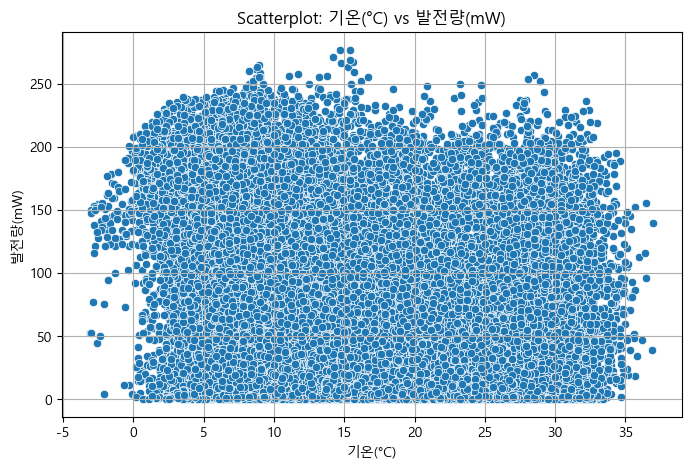

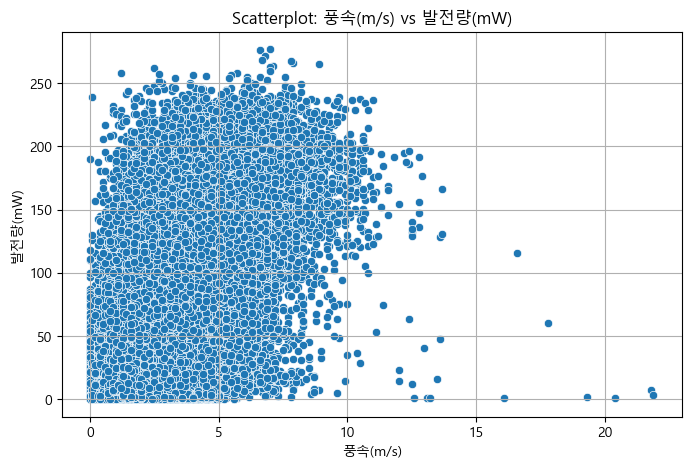

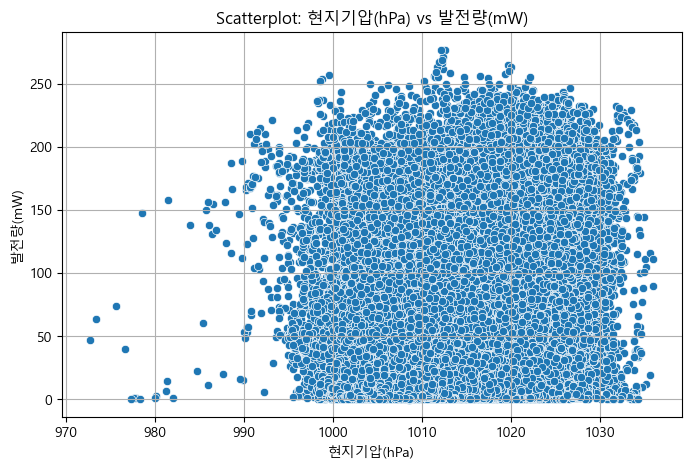

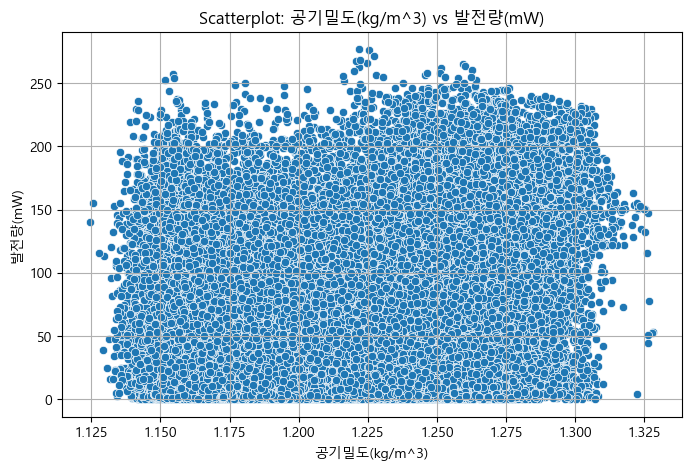

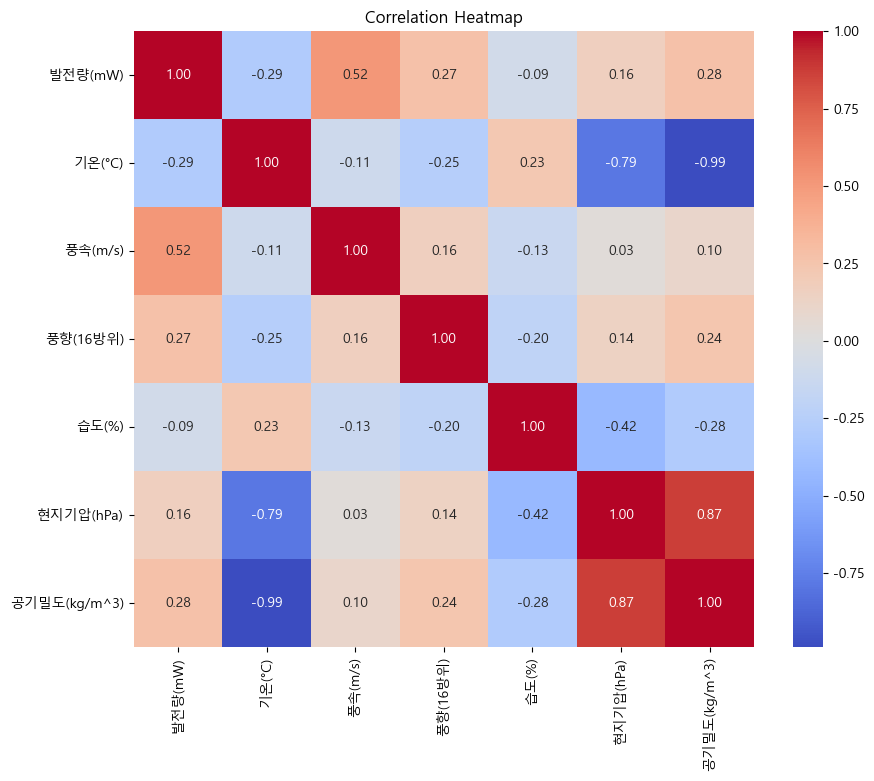


데이터프레임 컬럼 목록:
['지역', '일시', '발전량(mW)', '기온(°C)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '현지기압(hPa)', '공기밀도(kg/m^3)']


RandomForestRegressor(random_state=42)

In [17]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 폰트깨짐 방지 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
file_path = "./processed/Jeju_MergedData_20241217.csv"
data = pd.read_csv(file_path, encoding='EUC-KR')

# 공기밀도(kg/m^3) 계산
R = 287.05  # 공기 상수 (J/kg·K)
data["공기밀도(kg/m^3)"] = data["현지기압(hPa)"] * 100 / (R * (data["기온(°C)"] + 273.15))

# 변수 적용
X = data[["기온(°C)", "풍속(m/s)", "현지기압(hPa)", "공기밀도(kg/m^3)"]]
y = data["발전량(mW)"]  # 출력 변수

print(X)

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = rf_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("\n== 성능 평가 결과 ==")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
# =============================================================================
# == 성능 평가 결과 ==
# MAE (Mean Absolute Error): 37.38(발전량 예측에서 평균적으로 37.38mW의 오차가 발생)
# MSE (Mean Squared Error): 2388.75(예측값은 실제값으로부터 약 48.87mW 정도 벗어남)
# RMSE (Root Mean Squared Error):48.87(예측값은 실제값으로부터 약 48.87mW 정도 벗어남)
# R² Score: 0.37(37%만 설명할 수 있다는 의미)
# =============================================================================

# 산점도 시각화
features = ["기온(°C)", "풍속(m/s)", "현지기압(hPa)", "공기밀도(kg/m^3)"]
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[feature], y=data["발전량(mW)"])
    plt.title(f"Scatterplot: {feature} vs 발전량(mW)")
    plt.xlabel(feature)
    plt.ylabel("발전량(mW)")
    plt.grid(True)
    plt.show()

# 상관계수 히트맵
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

# 데이터프레임 컬럼 확인
print("\n데이터프레임 컬럼 목록:")
print(data.columns.tolist())

# 모델 피클링
joblib.dump(rf_model, '../models/saved_models/jeju_random_forest.pkl')

# 모델 확인
load_model = joblib.load('../models/saved_models/jeju_random_forest.pkl')
load_model